In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

# Import Nooksack River Height, Air Temp. and Precipitation (10/27/2022 - 2/23/2023)

In [2]:
df = pd.read_csv("CSVs/temp_rain_river_height_nooksack.csv", parse_dates = [5])
df.set_index('Date_Time')
#Remove Unnecessary Columns
df.drop('Date', axis = 1, inplace = True)
df.drop('Time', axis = 1, inplace = True)
df

,Height,Rain,Temp,Date_Time
0,3.94,0.0,47.4,2022-10-27 00:00:00
1,3.93,0.0,47.5,2022-10-27 00:15:00
2,3.92,0.0,47.6,2022-10-27 00:30:00
3,3.92,0.0,47.3,2022-10-27 00:45:00
4,3.91,0.0,47.4,2022-10-27 01:00:00
...,...,...,...,...
9730,5.75,0.0,30.6,2023-02-23 12:30:00
9731,5.75,0.0,31.7,2023-02-23 12:45:00
9732,5.74,0.0,31.8,2023-02-23 13:00:00
9733,5.73,0.0,33.7,2023-02-23 13:15:00


# Nooksack precipitation sampled every 15 min:

<AxesSubplot: xlabel='Date_Time'>

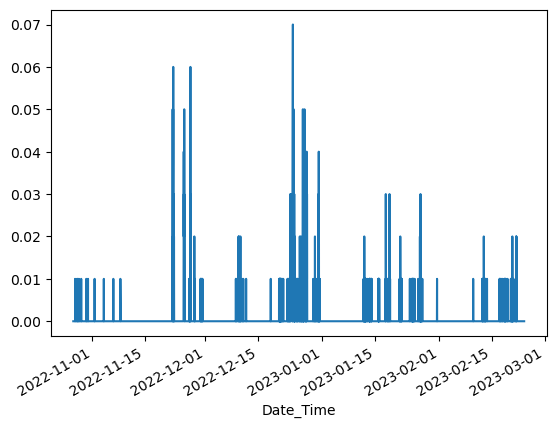

In [3]:
# For Precipitation
rain_data = df.iloc[:,1].tolist()
rainfall = pd.Series(rain_data, index = df.Date_Time)

# For River Height, not relevent to this plot
height_data = df.iloc[:,0].tolist()
height = pd.Series(height_data, index = df.Date_Time)

rainfall.plot()

# Nooksack precipitation downsampled to daily using sum of all recorded values for that day:

<AxesSubplot: xlabel='Date_Time'>

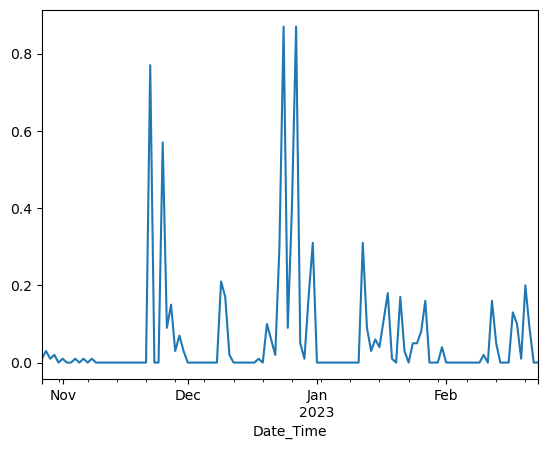

In [4]:
# For Rain
rain_resamp = rainfall.resample('1D').sum() # downsample rainfall to x amount of days (sum)

# For Height (not relevent to this plot)
height_resamp = height.resample('1D').mean() # set to same sample rate as rainfall (average)

rain_resamp.plot()

# Time Series of Air Temperature and Precipitation Superimposed on the Nooksack River Height Data

Text(0.5, 1.0, 'Nooksack River Height with Precipitation & Temperature')

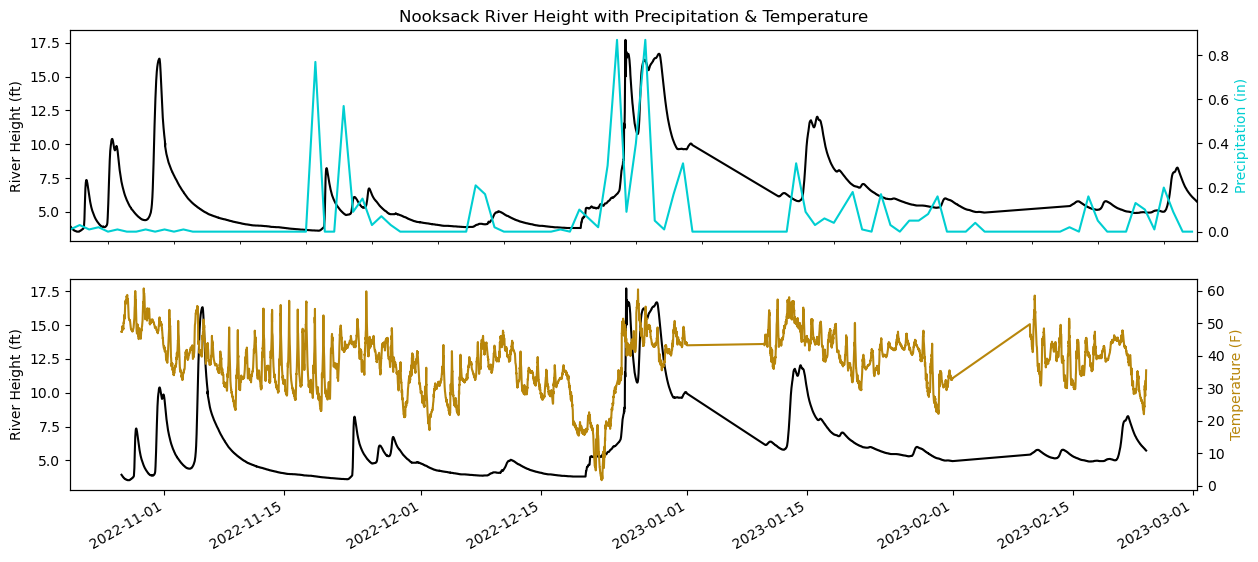

In [6]:
fig, axes = plt.subplots(figsize = (12, 6), nrows = 2)
ax0, ax1 = axes
fig.tight_layout() # add spacing between plots

axes[0].plot(df.Date_Time, df.Height, color = 'black')
ax0 = rain_resamp.plot(ax = axes[0], secondary_y = True, color = 'darkturquoise')
axes[0].set_ylabel('River Height (ft)')
ax0.set_ylabel('Precipitation (in)', color = 'darkturquoise') # secondary axis
axes[0].set_xlabel('')
axes[0].set_xticks([])

axes[1].plot(df.Date_Time, df.Height, color = 'black')
ax1 = df.plot(x = 'Date_Time', y = 'Temp', ax = axes[1], secondary_y = True, color = 'darkgoldenrod')
axes[1].set_ylabel('River Height (ft)')
ax1.set_ylabel('Temperature (F)', color = 'darkgoldenrod') # secondary axis
axes[1].set_xlabel('')
axes[1].get_legend().remove()

axes[0].set_title('Nooksack River Height with Precipitation & Temperature')

# Graphing Precipitation and Temperature Directly Against Height:

Text(0.5, 1.0, 'Nooksack River Height vs Precipitation')

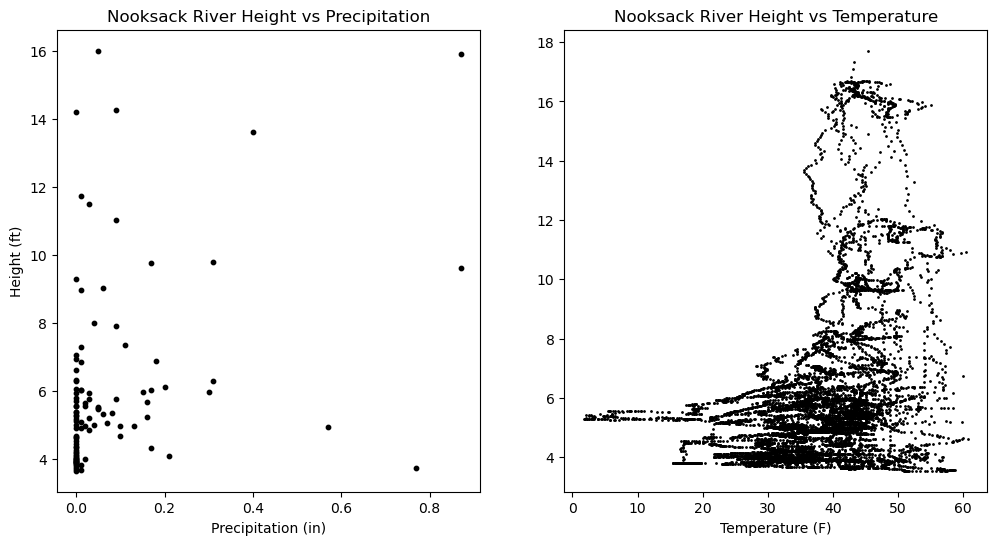

In [7]:
fig, axes = plt.subplots(figsize = (12, 6), ncols = 2)
ax0, ax1 = axes

axes[1].scatter(df.Temp, df.Height, color = 'black', s = 1)
axes[1].set_ylabel('')
axes[1].set_xlabel('Temperature (F)')
axes[1].set_title('Nooksack River Height vs Temperature')

axes[0].scatter(rain_resamp, height_resamp, color = 'black', s = 10)
axes[0].set_ylabel('Height (ft)')
axes[0].set_xlabel('Precipitation (in)')
axes[0].set_title('Nooksack River Height vs Precipitation')

# Import Cedar River Height and Air Temp Data (12/06/2020 - 03/06/2023):

In [8]:
cr_df = pd.read_csv("CSVs/cedar_river_height_airtemp.csv", parse_dates = [1])
cr_df.set_index('Date_Time')
cr_df

,Air_Temp_C,Date_Time,Height_ft
0,1.5,2020-12-06 00:00:00,1.63
1,1.5,2020-12-06 00:15:00,1.62
2,1.6,2020-12-06 00:30:00,1.62
3,1.7,2020-12-06 00:45:00,1.62
4,1.8,2020-12-06 01:00:00,1.62
...,...,...,...
76017,NaN,2023-03-06 14:15:00,1.65
76018,NaN,2023-03-06 14:30:00,1.66
76019,NaN,2023-03-06 14:45:00,1.66
76020,NaN,2023-03-06 15:00:00,1.65


# Graphing Cedar River Height With Air Temperature:

Text(0.5, 1.0, 'Cedar River Height with Air Temperature')

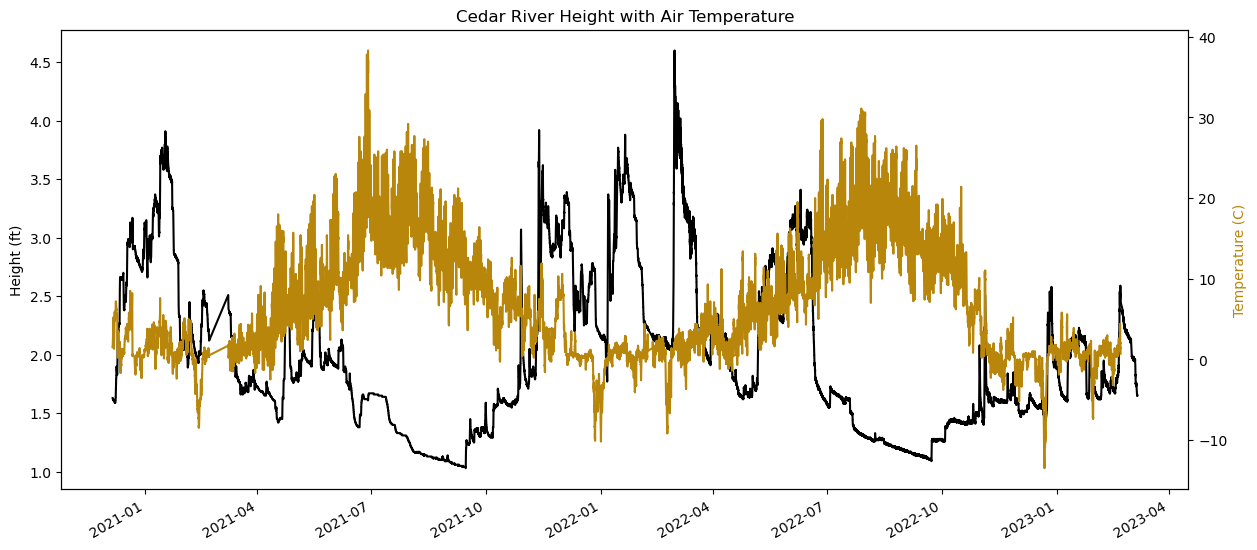

In [9]:
fig, axes = plt.subplots(figsize = (12, 6))
ax0 = axes
fig.tight_layout() # add spacing between plots

axes.plot(cr_df.Date_Time, cr_df.Height_ft, color = 'black')
ax0 = cr_df.plot(x = 'Date_Time', y = 'Air_Temp_C', ax = axes, secondary_y = True, color = 'darkgoldenrod')
axes.set_ylabel('Height (ft)')
ax0.set_ylabel('Temperature (C)', color = 'darkgoldenrod') # secondary axis
axes.set_xlabel('')
axes.get_legend().remove()

axes.set_title('Cedar River Height with Air Temperature')

# Graphing Cedar River Height vs Air Temperature:

Text(0.5, 1.0, 'Cedar River Height vs Temperature')

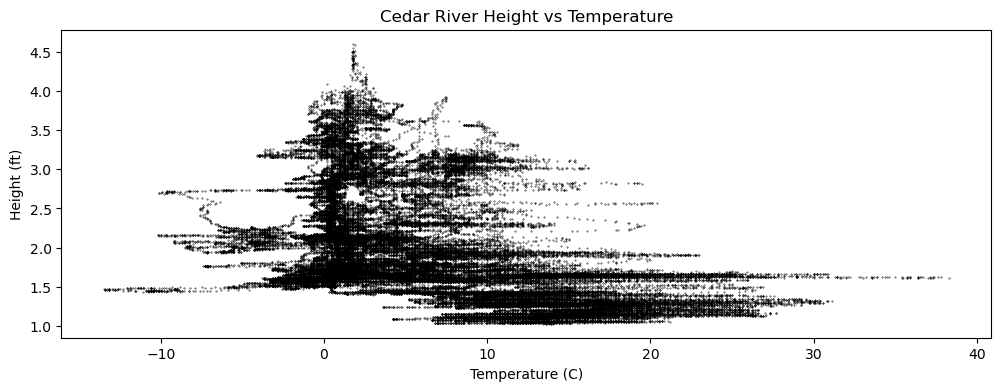

In [10]:
fig, axes = plt.subplots(figsize = (12,4))
axes.scatter(cr_df.Air_Temp_C, cr_df.Height_ft, s = 0.1, color = 'black')
axes.set_ylabel("Height (ft)")
axes.set_xlabel("Temperature (C)")
axes.set_title('Cedar River Height vs Temperature')

# Import 5 Years (03/07/2018 - 03/04/2023) of Nooksack and Cedar River Heights:

In [11]:
five_df = pd.read_csv("CSVs/5_years_nooksack_and_cedar_heights.csv", parse_dates = [1])
five_df.set_index('Date_Time')
five_df

,Cedar_Height,Date_Time,Nooksack_Height
0,8.98,2018-03-07 20:00:00,5.27
1,8.98,2018-03-07 20:15:00,5.27
2,8.98,2018-03-07 20:30:00,5.27
3,8.98,2018-03-07 20:45:00,5.27
4,8.98,2018-03-07 21:00:00,5.27
...,...,...,...
174758,8.90,2023-03-04 15:30:00,4.71
174759,8.89,2023-03-04 15:45:00,4.70
174760,8.89,2023-03-04 16:00:00,4.70
174761,8.88,2023-03-04 16:15:00,4.70


In [12]:
five_df.Cedar_Height.mean()
five_df.Nooksack_Height.mean()

6.427331586205318

# Time Series of the Heights of the Two Rivers on the Same Plot:

Text(0.5, 1.0, 'Nooksack vs Cedar River Measured Heights (5 years)')

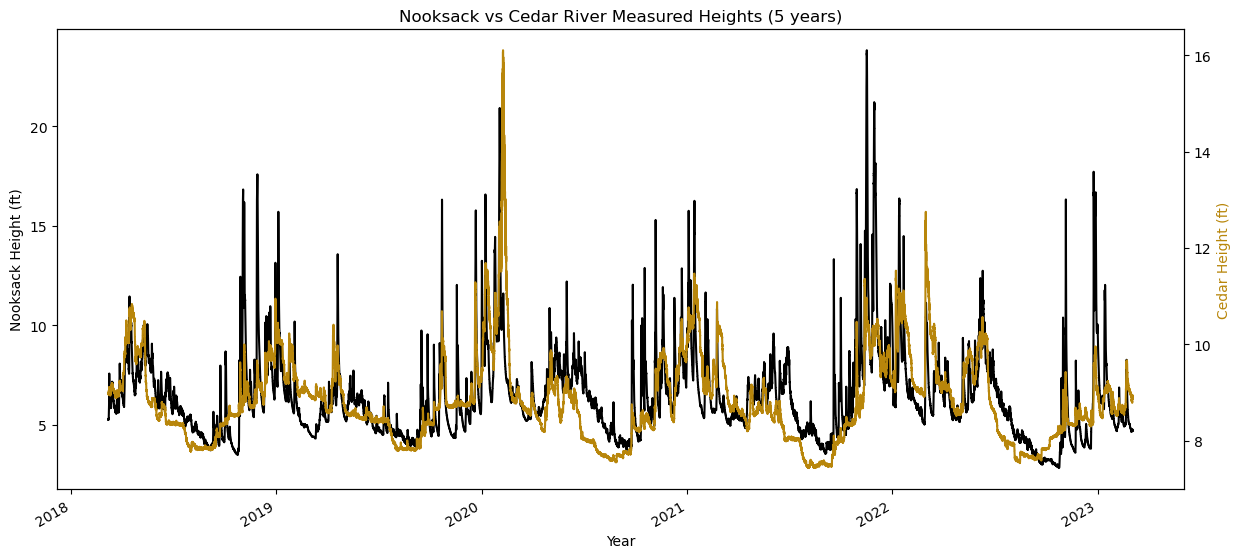

In [13]:
fig, axes = plt.subplots(figsize = (12, 6))
ax0 = axes
fig.tight_layout() # add spacing between plots

axes.plot(five_df.Date_Time, five_df.Nooksack_Height, color = 'black')
ax0 = five_df.plot(x = 'Date_Time', y = 'Cedar_Height', ax = axes, secondary_y = True, color = 'darkgoldenrod')
axes.set_ylabel('Nooksack Height (ft)')
ax0.set_ylabel('Cedar Height (ft)', color = 'darkgoldenrod') # secondary axis
axes.set_xlabel('Year')
axes.get_legend().remove()

axes.set_title('Nooksack vs Cedar River Measured Heights (5 years)')

# Import 15 Years (03/04/2008 - 03/04/2023) of Nooksack River Height Time Series Data:

In [14]:
df_15 = pd.read_csv("CSVs/RiverHeight_15_Years.csv", parse_dates = [4])
df_15.drop('Column1', axis = 1, inplace = True)
df_15.drop('Column3', axis = 1, inplace = True)
df_15.drop('Column4', axis = 1, inplace = True)
df_15

,Height,Date_Time
0,5.59,2008-03-04 00:00:00
1,5.59,2008-03-04 00:15:00
2,5.59,2008-03-04 00:30:00
3,5.59,2008-03-04 00:45:00
4,5.59,2008-03-04 01:00:00
...,...,...
522956,4.71,2023-03-04 15:30:00
522957,4.70,2023-03-04 15:45:00
522958,4.70,2023-03-04 16:00:00
522959,4.70,2023-03-04 16:15:00


# Time Series of 15 Years of Nooksack River Height

Text(0.5, 1.0, 'Nooksack River Height (15 Years)')

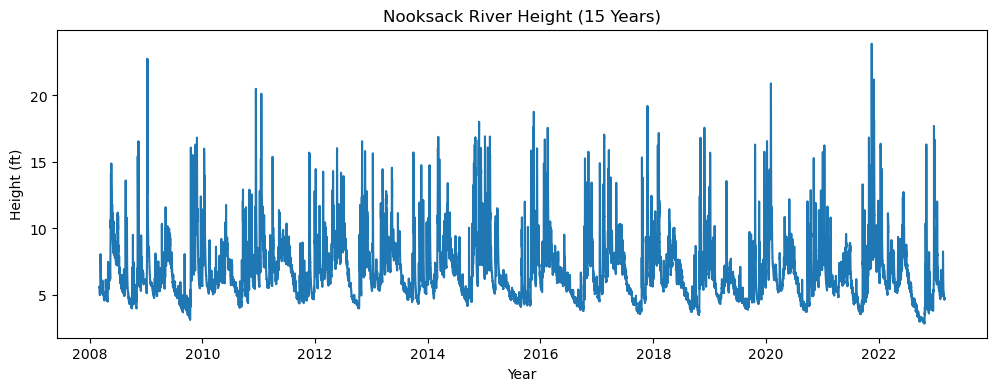

In [15]:
fig, axes = plt.subplots(figsize = (12,4))
axes.plot(df_15.Date_Time, df_15.Height)
axes.set_ylabel("Height (ft)")
axes.set_xlabel("Year")
axes.set_title('Nooksack River Height (15 Years)')

# Spectral Analysis of the 15 Years of Nooksack River Height Data:

In [16]:
height_data = df_15.iloc[:,0].tolist()
river_height = pd.Series(height_data, index = df_15.Date_Time)

In [17]:
#freq = np.fft.fftfreq(samples,t)
freq_spec = np.fft.fft(river_height.values) #fourier transform
N = river_height.shape[0]
n = np.arange(N)
print(N)

522961


In [18]:
t = 15 #period between samples in minutes

#sample rate
sr = 1/t

# Total duration of dataset in minutes
T = N * t

# Array of frequencies
freq = np.fft.fftfreq(N,t)
freq.shape

(522961,)

In [19]:
print(max(freq))
print(sr/2)

0.03333326959371732
0.03333333333333333


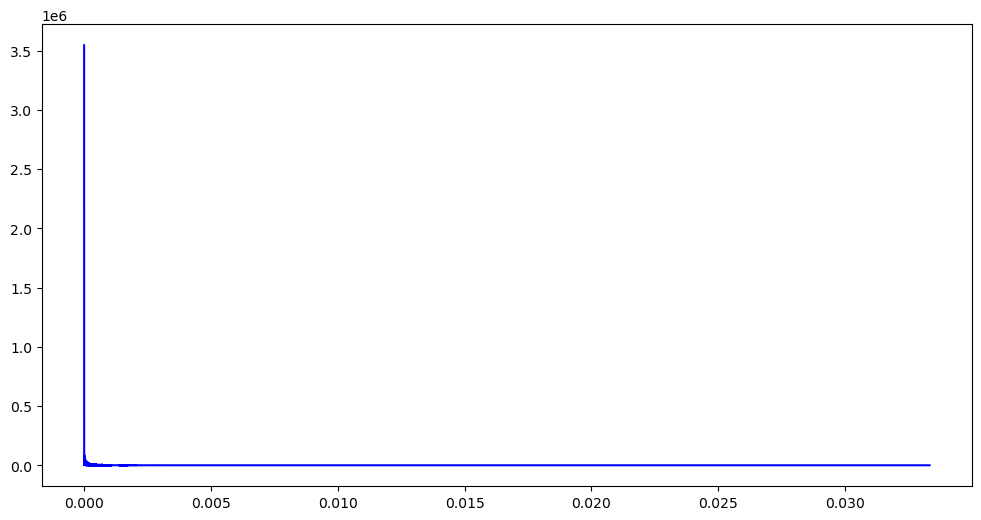

In [20]:
# Get one-sided sprectrum 
n_oneside = N//2

# Get one side frequency and amplitude spectrum
f_oneside = freq[:n_oneside] #one side frequency
f_spec_oneside = np.abs(freq_spec[:n_oneside]) # #amplitude spectrum

plt.figure(figsize = (12,6))
plt.plot(f_oneside, f_spec_oneside, 'b')

# Final Graph of Spectral Analysis of 15 Years of Nooksack River Height:

C:\Users\tydun\AppData\Local\Temp\ipykernel_4468\1360045391.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/(f_oneside * 96 * 30) / 365, f_spec_oneside, 'b') #convert to years (1/96 samples a day * 30 days in a month / 365 days in a year)


Text(0, 0.5, 'FFT Amplitude')

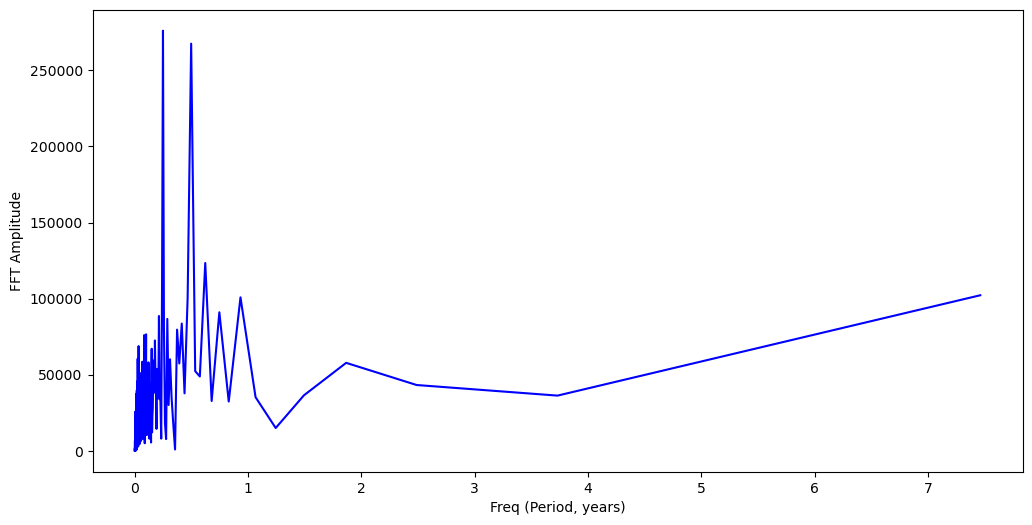

In [21]:
plt.figure(figsize = (12,6))
plt.plot(1/(f_oneside * 96 * 30) / 365, f_spec_oneside, 'b') #convert to years (1/96 samples a day * 30 days in a month / 365 days in a year)
plt.xlabel('Freq (Period, years)')
plt.ylabel('FFT Amplitude')
#plt.xlim(0, 0.00025)
#plt.ylim(0,2)